## Name: Linda Ly <br>

# Topic: Movie Data Analysis <br>

# Project Goal
My project goal is to analyze a dataset that focuses on movie statistics from the years of 1986-2016 (220 movies per year) and determine how certain factors affect each other. For example, I compared a movie’s score vs votes, score vs budget, and score vs gross.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Data Collection and Data Cleaning

In [ ]:
# Data collection and Data cleaning
# https://github.com/danielgrijalva/movie-stats
url = ("https://raw.githubusercontent.com/danielgrijalva/movie-stats/master/movies.csv")
df = pd.read_csv(url, index_col = ["name"])
drop_columns = ["year", "released", "company", "country", "writer", "runtime", "director", "rating", "star"]
df = df.drop(drop_columns, axis=1).dropna() # drop rows with null values
df

,genre,score,votes,budget,gross
name,,,,,
The Shining,Drama,8.4,927000.0,19000000.0,46998772.0
The Blue Lagoon,Adventure,5.8,65000.0,4500000.0,58853106.0
Star Wars: Episode V - The Empire Strikes Back,Action,8.7,1200000.0,18000000.0,538375067.0
Airplane!,Comedy,7.7,221000.0,3500000.0,83453539.0
Caddyshack,Comedy,7.3,108000.0,6000000.0,39846344.0
...,...,...,...,...,...
Bad Boys for Life,Action,6.6,140000.0,90000000.0,426505244.0
Sonic the Hedgehog,Action,6.5,102000.0,85000000.0,319715683.0
Dolittle,Adventure,5.6,53000.0,175000000.0,245487753.0


In [ ]:
# df.genre.unique()
# 'Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
#        'Crime', 'Fantasy', 'Animation', 'Family', 'Western', 'Sci-Fi',
#        'Romance', 'Thriller', 'Mystery'
# changing categorical variables to numerical
temp_df_genre = df
df = df.replace({"genre":{'Drama': 1, 'Adventure': 2, 'Action': 3, 'Comedy': 4, 'Horror': 5, 'Biography': 6,
       'Crime': 7, 'Fantasy': 8, 'Animation': 9, 'Family': 10, 'Western': 11, 'Sci-Fi': 12,
       'Romance': 13, 'Thriller': 14, 'Mystery': 15}})
df1_genre = df
df1 = df.drop(["genre"], axis=1)
df1

,score,votes,budget,gross
name,,,,
The Shining,8.4,927000.0,19000000.0,46998772.0
The Blue Lagoon,5.8,65000.0,4500000.0,58853106.0
Star Wars: Episode V - The Empire Strikes Back,8.7,1200000.0,18000000.0,538375067.0
Airplane!,7.7,221000.0,3500000.0,83453539.0
Caddyshack,7.3,108000.0,6000000.0,39846344.0
...,...,...,...,...
Bad Boys for Life,6.6,140000.0,90000000.0,426505244.0
Sonic the Hedgehog,6.5,102000.0,85000000.0,319715683.0
Dolittle,5.6,53000.0,175000000.0,245487753.0


I cleaned the dataset by dropping any unnecessary columns and removing any null rows. The columns I decided to keep are genre, score, votes, budget, and gross. I also replaced the data in the ‘genre’ column with numerical values.


#Data Preprocessing

In [ ]:
#Preprocessing data
normalized_df=(df1-df1.min())/(df1.max()-df1.min()) #MinMax Normalization
pairplot_df = normalized_df.copy()
# finalDF = normalized_df.insert(df[])
normalized_df.insert(4,"genre",df["genre"])
normalized_df

,score,votes,budget,gross,genre
name,,,,,
The Shining,0.878378,0.386200,0.053355,0.016507,1
The Blue Lagoon,0.527027,0.027004,0.012624,0.020670,2
Star Wars: Episode V - The Empire Strikes Back,0.918919,0.499959,0.050546,0.189086,3
Airplane!,0.783784,0.092010,0.009815,0.029310,4
Caddyshack,0.729730,0.044922,0.016837,0.013995,4
...,...,...,...,...,...
Bad Boys for Life,0.635135,0.058257,0.252796,0.149796,3
Sonic the Hedgehog,0.621622,0.042422,0.238751,0.112289,3
Dolittle,0.500000,0.022004,0.491564,0.086219,2


I used Min-Max Normalization for the preprocessing, except for the ‘genre’ column. For this, I had to drop the ‘genre’ column first, then perform the normalization on the other columns, and then add the ‘genre’ column back so that it would not be affected by the calculations.


# EDA

In [ ]:
#Visualization 1 - Pie chart showing frequency of each movie genre
genre_count_df = temp_df_genre["genre"].value_counts()
genre_count_df


Comedy       1496
Action       1417
Drama         869
Crime         400
Adventure     327
Biography     312
Animation     278
Horror        254
Fantasy        42
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

In [ ]:
other_label_df = temp_df_genre.replace({"genre":{'Fantasy': 'Other', 'Mystery': 'Other', "Thriller": 'Other', "Sci-Fi":'Other', "Romance": 'Other', "Family": 'Other', "Western": 'Other'}})
other_label_df

genre_count2_df = other_label_df["genre"].value_counts()
genre_count2_df

Comedy       1496
Action       1417
Drama         869
Crime         400
Adventure     327
Biography     312
Animation     278
Horror        254
Other          83
Name: genre, dtype: int64

([<matplotlib.patches.Wedge at 0x7fcc489cd7c0>,
 [Text(0.7138609426078999, 0.8369005643557429, 'Comedy'),
  Text(-0.911870278239951, 0.6152175189821844, 'Action'),
  Text(-0.8214456820237297, -0.7315920936454752, 'Drama'),
  Text(-0.12054330079474139, -1.0933751929843245, 'Crime'),
  Text(0.3359260110669192, -1.0474510561781243, 'Adventure'),
  Text(0.6913629010254505, -0.8555801184492738, 'Biography'),
  Text(0.9376716760083065, -0.5751276623600832, 'Animation'),
  Text(1.0677545613735364, -0.26438645325736193, 'Horror'),
  Text(1.0987347573776223, -0.052744032177469424, 'Other')],
 [Text(0.38937869596794533, 0.4564912169213142, '27.5%'),
  Text(-0.49738378813088235, 0.3355731921721005, '26.1%'),
  Text(-0.4480612811038525, -0.3990502328975319, '16.0%'),
  Text(-0.0657508913425862, -0.5963864689005406, '7.4%'),
  Text(0.183232369672865, -0.5713369397335223, '6.0%'),
  Text(0.3771070369229729, -0.4666800646086947, '5.7%'),
  Text(0.5114572778227126, -0.3137059976509544, '5.1%'),
  Text

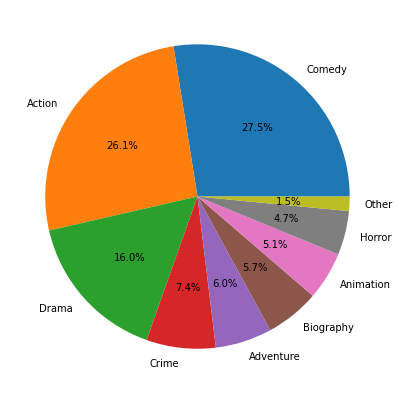

In [ ]:
genre_labels = ["Comedy", "Action", "Drama", "Crime", "Adventure", "Biography", "Animation", "Horror", "Other"]
plt.figure(figsize=(7,7))
plt.pie(genre_count2_df, labels = genre_labels, autopct='%1.1f%%')

<Axes: xlabel='Genre', ylabel='Frequency'>

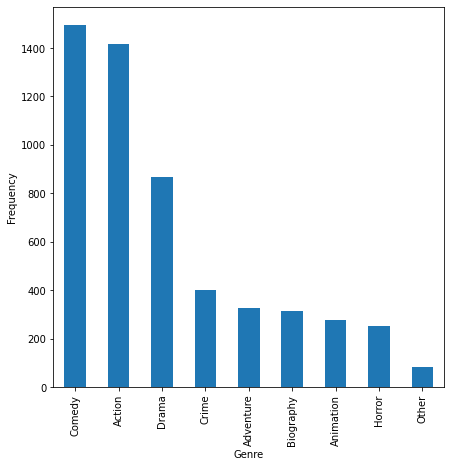

In [ ]:
genre_count2_df.plot(kind = "bar", figsize=(7,7), xlabel="Genre", ylabel="Frequency")

From the pie chart and bar graph, I see that comedy movies are the most popular type of movies from three decades of movie data, with Action being a close second.

([<matplotlib.patches.Wedge at 0x7fcc46175940>,
 [Text(1.0999787844201412, 0.006831824469994212, '0-3'),
  Text(1.0834380441293283, 0.1901630998201698, '3-5'),
  Text(-0.7961582385584876, 0.7590336350751834, '5-7'),
  Text(0.658438131079967, -0.881169238875212, '7-10')],
 [Text(0.5999884278655315, 0.0037264497109059337, '0.2%'),
  Text(0.5909662058887245, 0.10372532717463806, '5.1%'),
  Text(-0.43426813012281135, 0.41401834640464547, '65.1%'),
  Text(0.3591480714981638, -0.4806377666592065, '29.6%')])

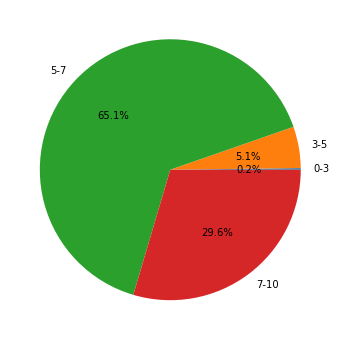

In [ ]:
# 0-3,3-5,5-7,7-10
range_labels = ['0-3','3-5','5-7','7-10']
temp_df_genre['grp'] = pd.cut(df['score'],(0,3,5,7,10), labels=range_labels)
plt.figure(figsize=(6,6))
plt.pie(temp_df_genre.groupby(['grp'])['score'].sum(), labels=range_labels, autopct='%1.1f%%')

From this pie chart, I see how the frequency of movies score and that many of movies score between 5 and 7.


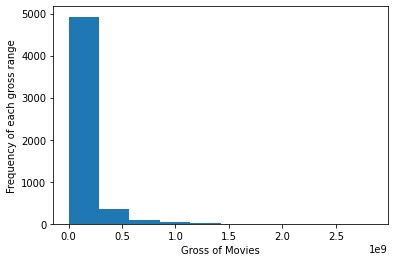

In [ ]:
#Histogram - frequency of gross
plt.hist(df['gross'])
plt.xlabel('Gross of Movies')
plt.ylabel('Frequency of each gross range')
plt.show()

For the gross of movies, the frequency of each gross range, it is skewed right with the approximate bin size of 0.1 to 0.3, where the most common movie gross is between `$100` million to `$300` million.

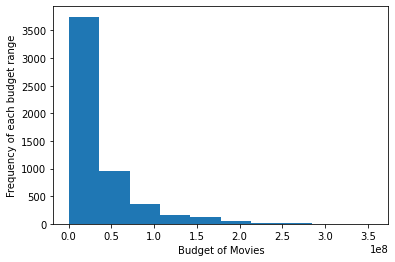

In [ ]:
#Histogram - frequency of budget
plt.hist(df['budget'])
plt.xlabel('Budget of Movies')
plt.ylabel('Frequency of each budget range')
plt.show()

From the histogram of frequency of each budget range, similar to gross, it is also skewed right. For the budget of movies, and looking at the frequency of each budget range, it is also skewed right, similar to frequency of each gross range, and the approximate bin size is 0.2 to 0.4, where the most common movie gross is between `$20` million to `$40` million.


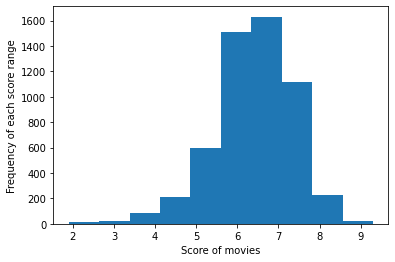

In [ ]:
#Histogram - frequency of score
plt.hist(df['score'])
plt.xlabel('Score of movies')
plt.ylabel('Frequency of each score range')
plt.show()

The frequency of movie scores, I see that the majority of the score range lies within 5 to 7 and that the data is skewed fairly to the left.

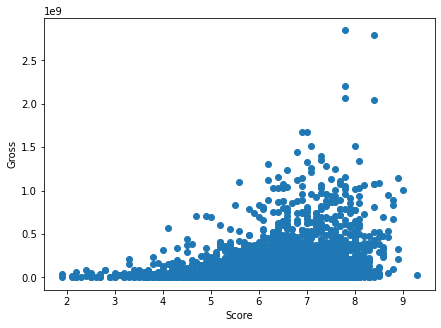

In [ ]:
#Scatter plot - score vs gross
plt.figure(figsize=(7,5))
plt.scatter(df['score'], df['gross'])
plt.xlabel('Score')
plt.ylabel('Gross')
plt.show()

Looking at score and gross, it’s a strong, positive relationship that has about 5 outliers for movies that have high scores and high gross.


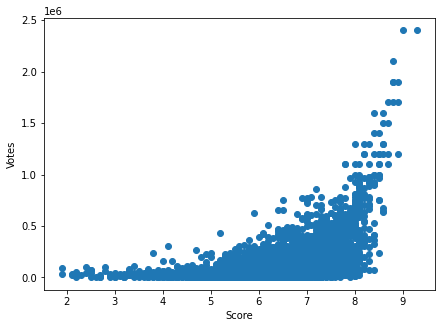

In [ ]:
#Scatter plot - score vs votes
plt.figure(figsize=(7,5))
plt.scatter(df['score'], df['votes'])
plt.xlabel('Score')
plt.ylabel('Votes')
plt.show()

Looking at score and votes, which is a moderately strong, positive, linear relationship with few outliers that are not too far away from the cluster.


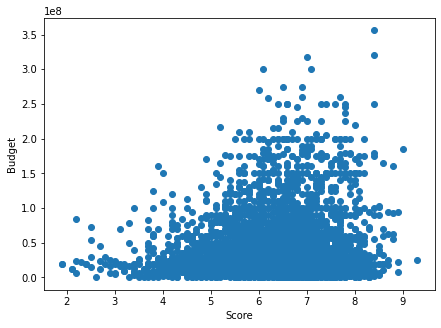

In [ ]:
#Scatter plot - score vs budget
plt.figure(figsize=(7,5))
plt.scatter(df['score'], df['budget'])
plt.xlabel('Score')
plt.ylabel('Budget')
plt.show()

Looking at score and budget, I can see that the cluster is in score range of 4 to 8 with a small budget.


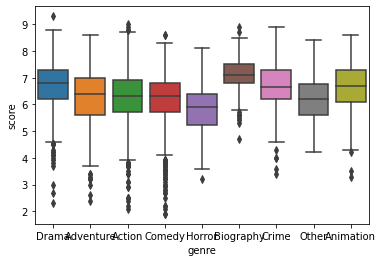

In [ ]:
sns.boxplot(data=other_label_df, x='genre', y='score')
sns.set(rc={'figure.figsize':(30,20)})
# other_label_df.boxplot(by ='genre', column =['score'], grid = False)

Using a boxplot, I explored the minimum, maximum, median, and also had outliers for each movie genre in regards to score. I can see that the average score for each genre is within the range of 6 to 7.

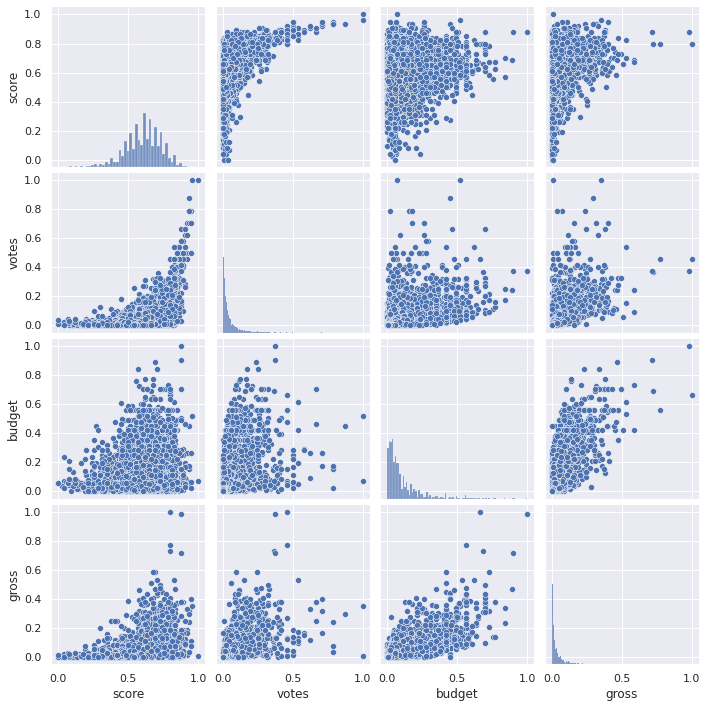

In [ ]:
sns.pairplot(pairplot_df)

To determine which features are most similar, I looked at a pairplot using the seaborn library to see the relationships between each pair of features that I am using. I saw that budget and gross, score and votes, score and budget, score and gross have a close relationship with each other, seeing that the histogram is equally distributed with score and moderately strong relationship with budget and gross. Scores and votes have a strong, linear relationship.  

#Method/Technique/Algorithms

## KNN REGRESSION; k=5

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

x = normalized_df[['gross', 'budget']]
y = normalized_df.score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state=12)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
prediction = knn_model.predict(x_test)

result = pd.DataFrame({'Actual Val':y_test, 'Prediction':prediction, 'Error':y_test-prediction})

# calculating the MSE of our model
calculate = pd.DataFrame({'temp': ((y_test-prediction)**2)}) #, 'Error':((y_test-prediction)**2)/len()
MSE = (calculate['temp'].sum())/len(result.index)


print("Mean Squared Error:", MSE)
result

Mean Squared Error: 0.01850244464558349


,Actual Val,Prediction,Error
name,,,
What's the Worst That Could Happen?,0.486486,0.605405,-0.118919
The Brady Bunch Movie,0.567568,0.600000,-0.032432
Cop,0.608108,0.613514,-0.005405
Harry Potter and the Half-Blood Prince,0.770270,0.689189,0.081081
My Family,0.729730,0.613514,0.116216
...,...,...,...
Star Trek II: The Wrath of Khan,0.783784,0.697297,0.086486
Torque,0.297297,0.589189,-0.291892
Unfriended: Dark Web,0.554054,0.656757,-0.102703


In [ ]:
unnormalize_result = (result*(np.max(df.score) - np.min(df.score))) + np.min(df.score)
unnormalize_result = unnormalize_result.drop(["Error"], axis=1)
unnormalize_result

,Actual Val,Prediction
name,,
What's the Worst That Could Happen?,5.5,6.38
The Brady Bunch Movie,6.1,6.34
Cop,6.4,6.44
Harry Potter and the Half-Blood Prince,7.6,7.00
My Family,7.3,6.44
...,...,...
Star Trek II: The Wrath of Khan,7.7,7.06
Torque,4.1,6.26
Unfriended: Dark Web,6.0,6.76


In [ ]:
unnormalize_result.loc[["Hostel"]] # finding the prediction of movie "Hostel"

,Actual Val,Prediction
name,,
Hostel,5.9,6.88


This KNN Regression calculation was for k = 5, where it takes the average of its 5 nearest neighbors to make the prediction, focusing on predicting score from gross and budget.


# KNN REGRESSION ; k=7

In [ ]:
knn_reg_data = normalized_df.drop(["genre", "votes"], axis=1)
knn_reg_data

,score,budget,gross
name,,,
The Shining,0.878378,0.053355,0.016507
The Blue Lagoon,0.527027,0.012624,0.020670
Star Wars: Episode V - The Empire Strikes Back,0.918919,0.050546,0.189086
Airplane!,0.783784,0.009815,0.029310
Caddyshack,0.729730,0.016837,0.013995
...,...,...,...
Bad Boys for Life,0.635135,0.252796,0.149796
Sonic the Hedgehog,0.621622,0.238751,0.112289
Dolittle,0.500000,0.491564,0.086219


In [ ]:
# Examining the distribution of the normalized data
knn_reg_data.describe().T

,count,mean,std,min,25%,50%,75%,max
score,5436.0,0.607114,0.130162,0.0,0.527027,0.621622,0.702703,1.0
budget,5436.0,0.100936,0.116709,0.0,0.028074,0.058973,0.126390,1.0
gross,5436.0,0.036177,0.065714,0.0,0.003749,0.012894,0.039318,1.0


In [ ]:
independent_vars = knn_reg_data.drop("score", axis = 1)
dependent_vars = knn_reg_data["score"]
independent_vars

,budget,gross
name,,
The Shining,0.053355,0.016507
The Blue Lagoon,0.012624,0.020670
Star Wars: Episode V - The Empire Strikes Back,0.050546,0.189086
Airplane!,0.009815,0.029310
Caddyshack,0.016837,0.013995
...,...,...
Bad Boys for Life,0.252796,0.149796
Sonic the Hedgehog,0.238751,0.112289
Dolittle,0.491564,0.086219


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


independent_train, independent_test, dependent_train, dependent_test = train_test_split(
    independent_vars,
    dependent_vars,
    test_size = 0.30,
    random_state = 20)

knn_model = KNeighborsRegressor(n_neighbors=7).fit(independent_train, dependent_train)
predictions = knn_model.predict(independent_test)
predict_df = pd.DataFrame({"Score Test" : dependent_test, "Score Predicted" : predictions})

# calculating the MSE of our model
calculate = pd.DataFrame({'temp': ((dependent_test-predictions)**2)}) #, 'Error':((y_test-prediction)**2)/len()
MSE = (calculate['temp'].sum())/len(predict_df.index)

print("Mean Squared Error:", MSE)
predict_df

Mean Squared Error: 0.016547675814676893


,Score Test,Score Predicted
name,,
Troy,0.716216,0.722008
Hostel,0.540541,0.654440
Ghost in the Shell,0.594595,0.586873
Diary of a Wimpy Kid: The Long Haul,0.324324,0.590734
House of the Dead,0.027027,0.619691
...,...,...
Aliens vs. Predator: Requiem,0.364865,0.608108
Elizabethtown,0.608108,0.586873
Chernobyl Diaries,0.418919,0.627413


In [ ]:
predict_df = (predict_df*(np.max(df.score) - np.min(df.score))) + np.min(df.score)
predict_df

,Score Test,Score Predicted
name,,
Troy,7.2,7.242857
Hostel,5.9,6.742857
Ghost in the Shell,6.3,6.242857
Diary of a Wimpy Kid: The Long Haul,4.3,6.271429
House of the Dead,2.1,6.485714
...,...,...
Aliens vs. Predator: Requiem,4.6,6.400000
Elizabethtown,6.4,6.242857
Chernobyl Diaries,5.0,6.542857


For the same prediction as above (k = 5), I then focused on k = 7.

I wanted to find the best k value for my dataset that gives me the minimum error possible. Starting with k=5 and using gross and budget as my training dataset in order to predict the score for a given movie, I saw it gave a mean squared error of 0.0185. In a second attempt with KNN regression using k=7, I saw it gave a mean squared error of 0.0165 which is a smaller error loss than k=5. The more neighbors to the training set for gross and budget, the smaller the error loss would be when predicting score.

# KNN REGRESSION using Gross as independent variable and predicting Score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import math
from sklearn.metrics import mean_squared_error

# only consider gross as independent variable for training
indep_gross = knn_reg_data.drop(["score", "budget"], axis = 1)
dep_gross = knn_reg_data["score"]
# indep_gross

independent_train_gross, independent_test_gross, dependent_train_gross, dependent_test_gross = train_test_split(
    indep_gross,
    dep_gross,
    test_size = 0.30,
    random_state = 20)

knn_model = KNeighborsRegressor(n_neighbors=7).fit(independent_train_gross, dependent_train_gross)
gross_predictions = knn_model.predict(independent_test_gross)

#Model Prediction Accuracy
score1 = knn_model.score(independent_train_gross, dependent_train_gross)
print("Coefficient of Determination:", score1)

mse1 = mean_squared_error(dependent_test_gross, gross_predictions)
print("Mean Squared Error:", mse1)

rmse1 = math.sqrt(mse1)
print("Root Mean Squared Error:", rmse1)
#end accuracy check

predict_df_gross = pd.DataFrame({"Score Test" : dependent_test_gross, "Score Predicted" : gross_predictions})
# predict_df_gross

predict_df_gross = (predict_df_gross*(np.max(df.score) - np.min(df.score))) + np.min(df.score)
predict_df_gross

Coefficient of Determination: 0.1919846162948563
Mean Squared Error: 0.017868701538028216
Root Mean Squared Error: 0.1336738625836338


,Score Test,Score Predicted
name,,
Troy,7.2,6.771429
Hostel,5.9,5.800000
Ghost in the Shell,6.3,6.571429
Diary of a Wimpy Kid: The Long Haul,4.3,6.957143
House of the Dead,2.1,6.071429
...,...,...
Aliens vs. Predator: Requiem,4.6,6.528571
Elizabethtown,6.4,7.271429
Chernobyl Diaries,5.0,5.571429


In [ ]:
mergeDF = pd.merge(predict_df_gross, df, on='name')
mergeDF

,Score Test,Score Predicted,genre,score,votes,budget,gross
name,,,,,,,
Troy,7.2,6.771429,1,7.2,500000.0,175000000.0,497409852.0
Hostel,5.9,5.800000,5,5.9,172000.0,4800000.0,81979826.0
Ghost in the Shell,6.3,6.571429,3,6.3,202000.0,110000000.0,169846945.0
Diary of a Wimpy Kid: The Long Haul,4.3,6.957143,9,4.3,7700.0,22000000.0,40140972.0
House of the Dead,2.1,6.071429,3,2.1,36000.0,12000000.0,13818181.0
...,...,...,...,...,...,...,...
Aliens vs. Predator: Requiem,4.6,6.528571,3,4.6,118000.0,40000000.0,130290885.0
Elizabethtown,6.4,7.271429,4,6.4,68000.0,45000000.0,52164016.0
Chernobyl Diaries,5.0,5.571429,5,5.0,65000.0,1000000.0,38390020.0


In [ ]:
grossDFScoreActual = mergeDF.drop(["score", "votes", "budget", "genre", "Score Predicted"], axis=1)
grossDFScoreActual

,Score Test,gross
name,,
Troy,7.2,497409852.0
Hostel,5.9,81979826.0
Ghost in the Shell,6.3,169846945.0
Diary of a Wimpy Kid: The Long Haul,4.3,40140972.0
House of the Dead,2.1,13818181.0
...,...,...
Aliens vs. Predator: Requiem,4.6,130290885.0
Elizabethtown,6.4,52164016.0
Chernobyl Diaries,5.0,38390020.0


In [ ]:
grossDFScorePredict = mergeDF.drop(["score", "votes", "budget", "genre", "Score Test"], axis=1)
grossDFScorePredict

,Score Predicted,gross
name,,
Troy,6.771429,497409852.0
Hostel,5.800000,81979826.0
Ghost in the Shell,6.571429,169846945.0
Diary of a Wimpy Kid: The Long Haul,6.957143,40140972.0
House of the Dead,6.071429,13818181.0
...,...,...
Aliens vs. Predator: Requiem,6.528571,130290885.0
Elizabethtown,7.271429,52164016.0
Chernobyl Diaries,5.571429,38390020.0


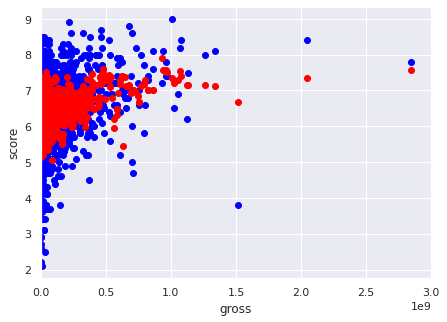

In [ ]:
# y_new = pd.Series(gross_predictions, index=grossDFScoreActual['gross'])

# plotting actual score against gross
plt.figure(figsize=(7,5))
#df.loc[df['gross'].idxmax()] # finding largest gross which is 2.847246e+09
plt.xlim(0, 3e+09)
plt.scatter(grossDFScoreActual['gross'], grossDFScoreActual['Score Test'], c='blue')
plt.xlabel('gross')
plt.ylabel('score')
# plt.show()

# plotting predicted score against gross
plt.scatter(grossDFScorePredict['gross'], grossDFScorePredict['Score Predicted'], c='red')
plt.show()

In [ ]:
df.loc[["Troy"]] # checking if it merged the "gross" correctly for Troy by using the original DF

,genre,score,votes,budget,gross
name,,,,,
Troy,1,7.2,500000.0,175000000.0,497409852.0


From the previous k values, I saw that with k=7, it gave a smaller error so I used that for the following KNN regressions.

For my next KNN calculation, I focused on predicting the score based on gross being an independent variable. After getting my KNN model with k=7, I needed to check my model’s prediction accuracy. I saw the mean squared error for gross and predicted score to be 0.0178. Looking above at my tables, I can see that the score predicted and actual score are fairly good, except for a few outliers like the predicted score and actual score for “House of the Dead”.

# KNN REGRESSION only using Budget as independent variable and predicting Score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import math
from sklearn.metrics import mean_squared_error

# only consider BUDGET as independent variable for training
indep_budget = knn_reg_data.drop(["score", "gross"], axis = 1)
dep_budget = knn_reg_data["score"]
# indep_budget

independent_train_budget, independent_test_budget, dependent_train_budget, dependent_test_budget = train_test_split(
    indep_budget,
    dep_budget,
    test_size = 0.30,
    random_state = 20)

knn_model_budget = KNeighborsRegressor(n_neighbors=7).fit(independent_train_budget, dependent_train_budget)
budget_predictions = knn_model_budget.predict(independent_test_budget)

#Model Prediction Accuracy
score2 = knn_model_budget.score(independent_train_budget, dependent_train_budget)
print("Coefficient of Determination:", score2)

mse2 = mean_squared_error(dependent_test_budget, budget_predictions)
print("Mean Squared Error:", mse2)

rmse2 = math.sqrt(mse2)
print("Root Mean Squared Error:", rmse2)
#end accuracy check

predict_df_budget = pd.DataFrame({"Score Test" : dependent_test_budget, "Score Predicted" : budget_predictions})
# predict_df_budget

predict_df_budget = (predict_df_budget*(np.max(df.score) - np.min(df.score))) + np.min(df.score)
predict_df_budget

Coefficient of Determination: 0.005723942638615531
Mean Squared Error: 0.01761090079600409
Root Mean Squared Error: 0.13270606917546798


,Score Test,Score Predicted
name,,
Troy,7.2,6.400000
Hostel,5.9,6.400000
Ghost in the Shell,6.3,6.671429
Diary of a Wimpy Kid: The Long Haul,4.3,6.528571
House of the Dead,2.1,6.628571
...,...,...
Aliens vs. Predator: Requiem,4.6,6.585714
Elizabethtown,6.4,6.385714
Chernobyl Diaries,5.0,5.842857


In [ ]:
mergeDFBud = pd.merge(predict_df_budget, df, on='name')
mergeDFBud

,Score Test,Score Predicted,genre,score,votes,budget,gross
name,,,,,,,
Troy,7.2,6.400000,1,7.2,500000.0,175000000.0,497409852.0
Hostel,5.9,6.400000,5,5.9,172000.0,4800000.0,81979826.0
Ghost in the Shell,6.3,6.671429,3,6.3,202000.0,110000000.0,169846945.0
Diary of a Wimpy Kid: The Long Haul,4.3,6.528571,9,4.3,7700.0,22000000.0,40140972.0
House of the Dead,2.1,6.628571,3,2.1,36000.0,12000000.0,13818181.0
...,...,...,...,...,...,...,...
Aliens vs. Predator: Requiem,4.6,6.585714,3,4.6,118000.0,40000000.0,130290885.0
Elizabethtown,6.4,6.385714,4,6.4,68000.0,45000000.0,52164016.0
Chernobyl Diaries,5.0,5.842857,5,5.0,65000.0,1000000.0,38390020.0


In [ ]:
budgetDFScoreActual = mergeDFBud.drop(["score", "votes", "gross", "genre", "Score Predicted"], axis=1)
budgetDFScoreActual

,Score Test,budget
name,,
Troy,7.2,175000000.0
Hostel,5.9,4800000.0
Ghost in the Shell,6.3,110000000.0
Diary of a Wimpy Kid: The Long Haul,4.3,22000000.0
House of the Dead,2.1,12000000.0
...,...,...
Aliens vs. Predator: Requiem,4.6,40000000.0
Elizabethtown,6.4,45000000.0
Chernobyl Diaries,5.0,1000000.0


In [ ]:
budgetDFScorePredict = mergeDF.drop(["score", "votes", "gross", "genre", "Score Test"], axis=1)
budgetDFScorePredict

,Score Predicted,budget
name,,
Troy,6.771429,175000000.0
Hostel,5.800000,4800000.0
Ghost in the Shell,6.571429,110000000.0
Diary of a Wimpy Kid: The Long Haul,6.957143,22000000.0
House of the Dead,6.071429,12000000.0
...,...,...
Aliens vs. Predator: Requiem,6.528571,40000000.0
Elizabethtown,7.271429,45000000.0
Chernobyl Diaries,5.571429,1000000.0


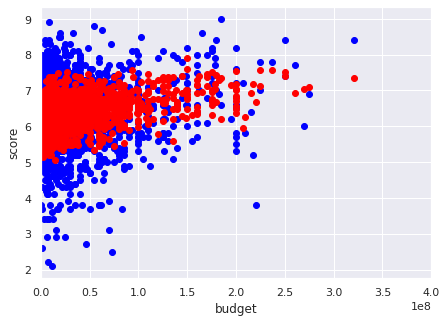

In [ ]:
# plotting actual score against budget
plt.figure(figsize=(7,5))
#df.loc[df['budget'].idxmax()] # finding largest budget which is 3.560000e+08
plt.xlim(0, 4e+08)
plt.scatter(budgetDFScoreActual['budget'], budgetDFScoreActual['Score Test'], c='blue')
plt.xlabel('budget')
plt.ylabel('score')

# plotting predicted score against budget
plt.scatter(budgetDFScorePredict['budget'], budgetDFScorePredict['Score Predicted'], c='red')
plt.show()

The next KNN regression calculation I performed was to predict score based on the movie’s budget, which was the independent variable here. I performed the mean squared error calculation as well and found it to be 0.01761 which means it’s close to 0 so it’s very accurate. Following the calculations, I also created a plot as shown above. The blue plots represent the budget vs actual score, while the red plots represent budget vs predicted score. Based on how similar the red and blue plots are to each other, just by looking at it, I can say that the prediction is very accurate as well. With the mean squared error value as well, I can determine that overall this model is accurate in predicting the scores based on a movie’s budget.

# KNN REGRESSION only using Budget as independent variable and predicting Gross

In [ ]:
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# only consider BUDGET as independent variable for training
X_budget = knn_reg_data.drop(["score", "gross"], axis = 1)
y_gross = knn_reg_data["gross"]

X_train_budget, X_test_budget, y_train_gross, y_test_gross = train_test_split(
    X_budget,
    y_gross,
    test_size = 0.30,
    random_state = 20)

knn_model_budgetGross = KNeighborsRegressor(n_neighbors=7).fit(X_train_budget, y_train_gross)
gross_predictions = knn_model_budgetGross.predict(X_test_budget)

#Model Prediction Accuracy
score3 = knn_model_budgetGross.score(X_train_budget, y_train_gross)
print("Coefficient of Determination:", score2)

mse3 = mean_squared_error(y_test_gross, gross_predictions)
print("Mean Squared Error:", mse3)

rmse3 = math.sqrt(mse3)
print("Root Mean Squared Error:", rmse3)
#end accuracy check

predict_df_gross = pd.DataFrame({"Gross Test" : y_test_gross, "Gross Predicted" : gross_predictions})
predict_df_gross = (predict_df_gross*(np.max(df.gross) - np.min(df.gross))) + np.min(df.gross)
predict_df_gross


Coefficient of Determination: 0.005723942638615531
Mean Squared Error: 0.0022045732489578075
Root Mean Squared Error: 0.0469528832869485


,Gross Test,Gross Predicted
name,,
Troy,497409852.0,4.727161e+08
Hostel,81979826.0,4.474432e+07
Ghost in the Shell,169846945.0,4.105951e+08
Diary of a Wimpy Kid: The Long Haul,40140972.0,1.293684e+08
House of the Dead,13818181.0,5.872859e+06
...,...,...
Aliens vs. Predator: Requiem,130290885.0,1.068343e+08
Elizabethtown,52164016.0,1.374568e+08
Chernobyl Diaries,38390020.0,2.714686e+07


In [ ]:
mergeDFGross = pd.merge(predict_df_gross, df, on='name')
mergeDFGross


,Gross Test,Gross Predicted,genre,score,votes,budget,gross
name,,,,,,,
Troy,497409852.0,4.727161e+08,1,7.2,500000.0,175000000.0,497409852.0
Hostel,81979826.0,4.474432e+07,5,5.9,172000.0,4800000.0,81979826.0
Ghost in the Shell,169846945.0,4.105951e+08,3,6.3,202000.0,110000000.0,169846945.0
Diary of a Wimpy Kid: The Long Haul,40140972.0,1.293684e+08,9,4.3,7700.0,22000000.0,40140972.0
House of the Dead,13818181.0,5.872859e+06,3,2.1,36000.0,12000000.0,13818181.0
...,...,...,...,...,...,...,...
Aliens vs. Predator: Requiem,130290885.0,1.068343e+08,3,4.6,118000.0,40000000.0,130290885.0
Elizabethtown,52164016.0,1.374568e+08,4,6.4,68000.0,45000000.0,52164016.0
Chernobyl Diaries,38390020.0,2.714686e+07,5,5.0,65000.0,1000000.0,38390020.0


In [ ]:
DFGrossActual = mergeDFGross.drop(["score", "votes", "gross", "genre", "Gross Predicted"], axis=1)
DFGrossActual


,Gross Test,budget
name,,
Troy,497409852.0,175000000.0
Hostel,81979826.0,4800000.0
Ghost in the Shell,169846945.0,110000000.0
Diary of a Wimpy Kid: The Long Haul,40140972.0,22000000.0
House of the Dead,13818181.0,12000000.0
...,...,...
Aliens vs. Predator: Requiem,130290885.0,40000000.0
Elizabethtown,52164016.0,45000000.0
Chernobyl Diaries,38390020.0,1000000.0


In [ ]:
DFGrossPredict = mergeDFGross.drop(["score", "votes", "gross", "genre", "Gross Test"], axis=1)
DFGrossPredict


,Gross Predicted,budget
name,,
Troy,4.727161e+08,175000000.0
Hostel,4.474432e+07,4800000.0
Ghost in the Shell,4.105951e+08,110000000.0
Diary of a Wimpy Kid: The Long Haul,1.293684e+08,22000000.0
House of the Dead,5.872859e+06,12000000.0
...,...,...
Aliens vs. Predator: Requiem,1.068343e+08,40000000.0
Elizabethtown,1.374568e+08,45000000.0
Chernobyl Diaries,2.714686e+07,1000000.0


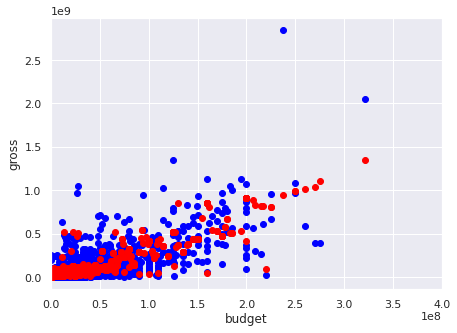

In [ ]:
# plotting actual score against budget
plt.figure(figsize=(7, 5))
#df.loc[df['budget'].idxmax()] # finding largest budget which is 3.560000e+08
plt.xlim(0, 4e+08)
plt.scatter(DFGrossActual['budget'], DFGrossActual['Gross Test'], c='blue')
plt.xlabel('budget')
plt.ylabel('gross')

# plotting predicted score against budget
plt.scatter(DFGrossPredict['budget'], DFGrossPredict['Gross Predicted'], c='red')
plt.show()

The last KNN regression calculation I performed uses budget as the independent variable and predicts the gross of movies. In the plot above, the blue represents the actual gross against budget while the red represents the predicted gross against budget. From just looking at it, I can see that the predictions do fairly well and follow the general trend of the actual gross of movies given the budget. However, I wanted an actual value that could tell me about my model’s accuracy. I performed mean squared error as a way to get some sort of account for accuracy. For this model, I got a mean squared error value of 0.0022 which I believe to be good as it is close to 0. By comparing the actual and predicted values by eye, looking at the plot, and examining the mean squared error value, I believe this model’s accuracy is fairly good.

# Conclusion

The goal of this project is to analyze the characteristics of a movie such as the budget, score, and genre in order to predict another characteristic. Before building my machine learning models, I used the Min-Max normalization technique to prepare my data for analyses. I did this to ensure that the variables with values of high magnitude would not affect the variables with values of much smaller magnitudes during the training of my models. I used KNN regression to form predictions and calculated mean squared errors to assess the accuracy of my predictions.

Based on my results from the KNN Regression, I found that using two features, the gross and the budget, were the best in predicting the score of a movie. This is because it resulted in having the smallest mean squared error compared to the other two models I built in the prediction of the scores (using either gross or budget to predict a movie’s score). Not only did I build models to predict a movie score, I also built a KNN Regression model to predict the gross of a movie using the budget as its feature. I found that the accuracy of this model was quite high when predicting the movie’s gross given a budget as its input. For instance, when the model was given the budget of \$175000000.00 for the movie “Troy” as test input, it predicted that the gross would be \$472716100.00 which is quite close to its actual gross of \$497409852.00.
